# Factorial design

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

## Data

In [ ]:
plt.rcParams["figure.figsize"] = (12,6) # 10, 5
filename = 'data.txt'
data = pd.read_csv(filename, header=None, sep=' ', error_bad_lines=False)

We want to factorize our categorical variables. 0 will denote "+" and 1 will denote "-".

In [ ]:
data[1] = data[1].factorize()[0]
data[2] = data[2].factorize()[0]

In [ ]:
data.columns = ['group', 'RW', 'RL', 'time']

In [ ]:
data

,group,RW,RL,time
0,1,0,0,2.08
1,1,0,1,1.67
2,1,1,0,2.40
3,1,1,1,1.65
4,2,0,0,1.72
5,2,0,1,1.42
6,2,1,0,2.41
7,2,1,1,1.58
8,1,0,0,1.98
9,1,0,1,1.53


## Histogram

In [ ]:
times = data[['time']]

In [ ]:
bin_count = int((times.max() - times.min()) / 0.1)

In [ ]:
bin_count

12

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb8ae9cb38>]],
      dtype=object)

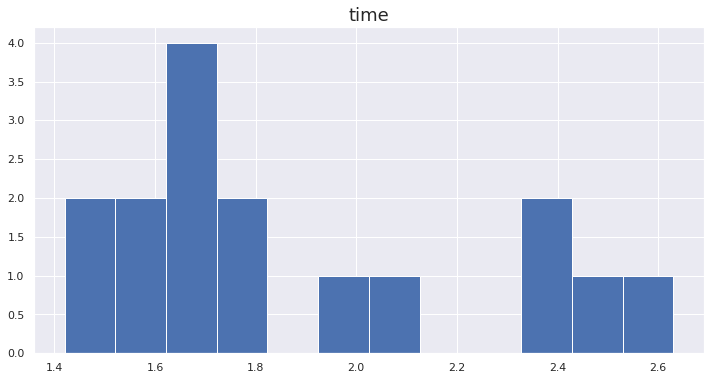

In [ ]:
times.hist(bins=bin_count)

## Box plot

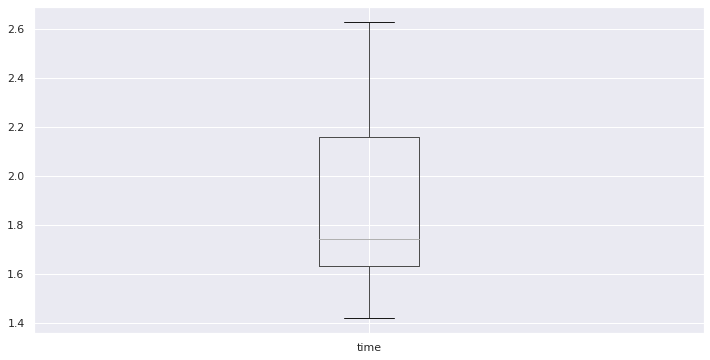

In [ ]:
times.boxplot()

## Scatter plot

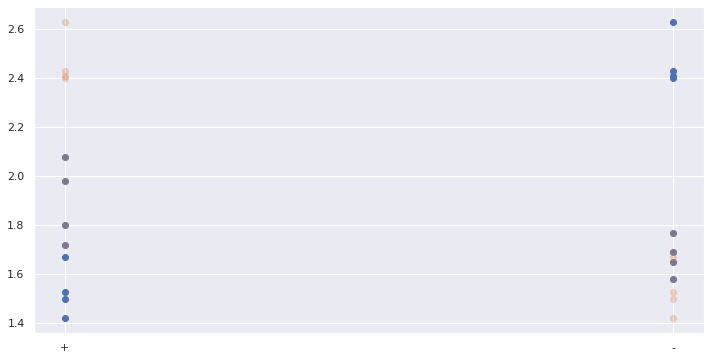

In [ ]:
plt.xticks([0, 1], ['+', '-'])
plt.scatter(data['RW'], times)
plt.scatter(data['RL'], times,  alpha=0.3)

## Interaction

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot

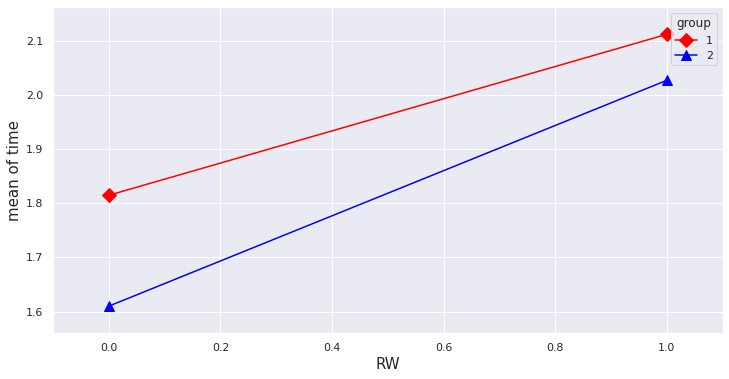

In [ ]:
fig = interaction_plot(data['RW'], data['group'], data['time'], colors=['red','blue'], markers=['D','^'], ms=10)

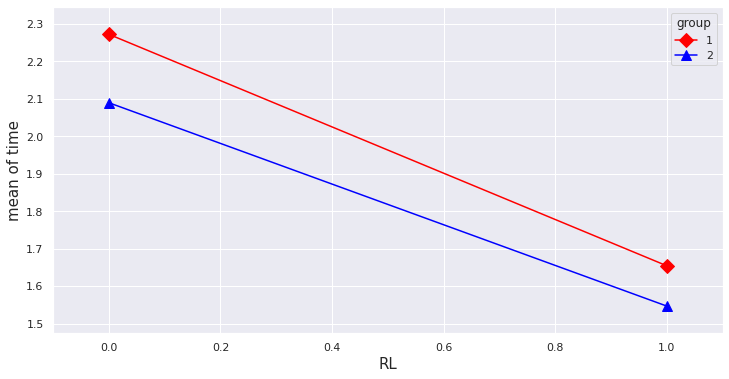

In [ ]:
fig = interaction_plot(data['RL'], data['group'], data['time'], colors=['red','blue'], markers=['D','^'], ms=10)

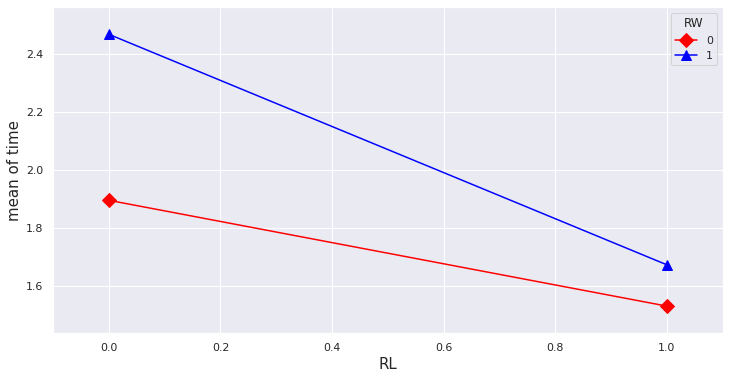

In [ ]:
fig = interaction_plot(data['RL'], data['RW'], data['time'], colors=['red','blue'], markers=['D','^'], ms=10)

There seem to be no interactions here.

## Main effects


### Determining the main effects

In [ ]:
# Calculate time means for:
# RW
time_mean_for_RW_plus = data.loc[data['RW']==0][['time']].mean()
time_mean_for_RW_minus = data.loc[data['RW']==1][['time']].mean()
print(time_mean_for_RW_plus)
print(time_mean_for_RW_minus)

#RL
time_mean_for_RL_plus = data.loc[data['RL']==0][['time']].mean()
time_mean_for_RL_minus = data.loc[data['RL']==1][['time']].mean()
print(time_mean_for_RL_plus)
print(time_mean_for_RL_minus)

#group
time_mean_for_group1 = data.loc[data['group']==1][['time']].mean()
time_mean_for_group2 = data.loc[data['group']==2][['time']].mean()
print(time_mean_for_group1)
print(time_mean_for_group2)

time    1.7125
dtype: float64
time    2.07
dtype: float64
time    2.18125
dtype: float64
time    1.60125
dtype: float64
time    1.96375
dtype: float64
time    1.81875
dtype: float64


In [ ]:
RW_effect = time_mean_for_RW_minus - time_mean_for_RW_plus
RL_effect = time_mean_for_RL_minus - time_mean_for_RL_plus
group_effect = time_mean_for_group2 - time_mean_for_group1

print(RW_effect)
print(RL_effect)
print(group_effect)

time    0.3575
dtype: float64
time   -0.58
dtype: float64
time   -0.145
dtype: float64


### Main Effects Plot

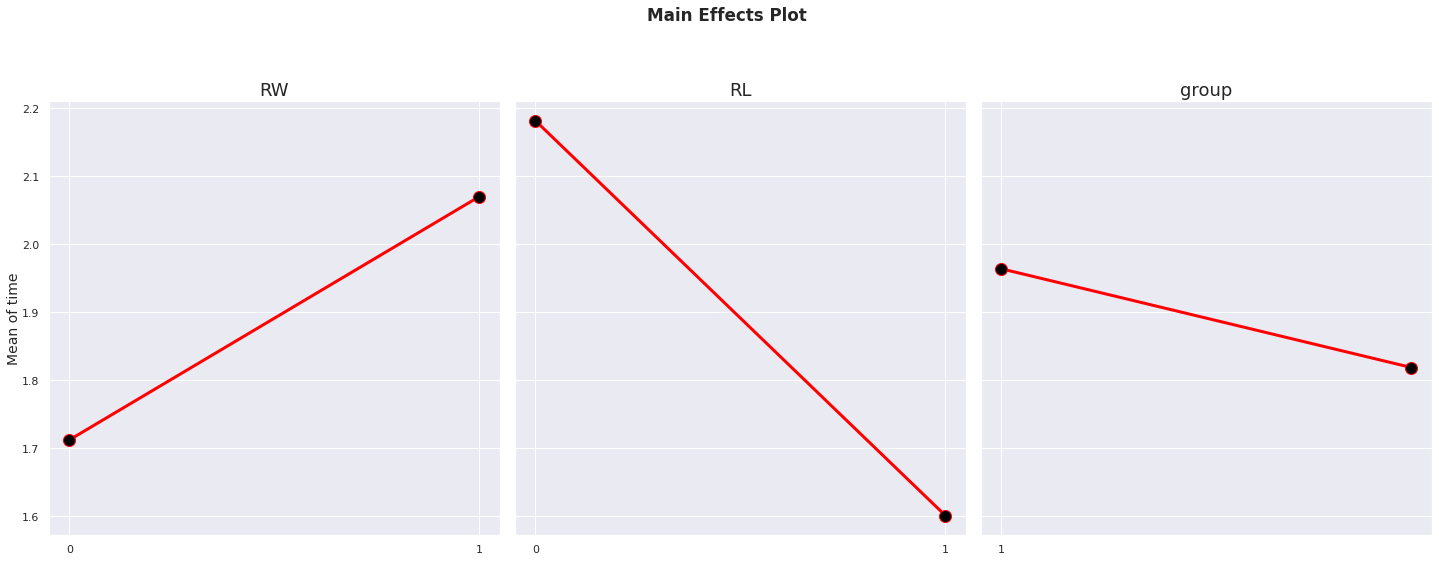

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7), sharey=True)

fig.text(0.5, 1.1, 'Main Effects Plot', ha='center', va='center', weight = 'bold', size = 'large')
fig.text(0.005, 0.5, 'Mean of time', ha='center', va='center', rotation='vertical')

plt.setp(axes, xticks=[0, 1])

# Draw plot for RW
x1 = [0, 1]
y1 = [time_mean_for_RW_plus, time_mean_for_RW_minus]
axes[0].plot(x1, y1, color='red', linestyle='-', linewidth = 3, 
         marker='o', markerfacecolor='black', markersize=12) 
axes[0].set_title('RW')
# axes[0].set_ylim([1.6, 2.6])

# Draw plot for RL
x2 = [0, 1]
y2 = [time_mean_for_RL_plus, time_mean_for_RL_minus]
axes[1].plot(x2, y2, color='red', linestyle='-', linewidth = 3, 
         marker='o', markerfacecolor='black', markersize=12) 
axes[1].set_title('RL')
# axes[1].set_ylim([1.6, 2.6])


# Draw plot for group
x3 = [1, 2]
y3 = [time_mean_for_group1, time_mean_for_group2]
axes[2].plot(x3, y3, color='red', linestyle='-', linewidth = 3, 
         marker='o', markerfacecolor='black', markersize=12) 
axes[2].set_title('group')
# axes[2].set_ylim([1.6, 2.6])


fig.tight_layout()
plt.show()

The average change in the response (time) as the
level of the RL factor changes is slightly bigger than the average response change when RW factor is changed. The group does not seem to have much effect on response.

## ANOVA

In [ ]:
stats.f_oneway(data['time'][data['RW'] == 0], data['time'][data['RW'] == 1])

F_onewayResult(statistic=4.213186166298749, pvalue=0.05929496064757252)

In [ ]:
formula = 'time ~ C(RW)*C(RL)*C(group)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

                       df    sum_sq   mean_sq           F        PR(>F)
C(RW)                 1.0  0.511225  0.511225   66.936170  3.714464e-05
C(RL)                 1.0  1.345600  1.345600  176.183306  9.906160e-07
C(group)              1.0  0.084100  0.084100   11.011457  1.056597e-02
C(RW):C(RL)           1.0  0.184900  0.184900   24.209493  1.163552e-03
C(RW):C(group)        1.0  0.014400  0.014400    1.885434  2.069697e-01
C(RL):C(group)        1.0  0.005625  0.005625    0.736498  4.157552e-01
C(RW):C(RL):C(group)  1.0  0.003025  0.003025    0.396072  5.466723e-01
Residual              8.0  0.061100  0.007638         NaN           NaN


Based on this table, factors RW and RL are statistically significant and interaction effect between RW and RL is also statistically significant (we reject the null hypothesis for those factors).

## Post-hoc tests (Tukey, Benferroni)

In [ ]:
mc = MultiComparison(data['time'], data['RW'])
print(mc.tukeyhsd())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.3575 0.0593 -0.0161 0.7311  False
---------------------------------------------------


In [ ]:
rejected, pvals_corrected, _, _ = multipletests(pvals=aov_table['PR(>F)'].dropna(), alpha=0.01, method='bonferroni', is_sorted=False)

In [ ]:
rejected

array([ True,  True, False,  True, False, False, False])

We do reject the null hypothesis for factors: RW, RL and the interaction effect between RW and RL.

In [ ]:
pvals_corrected

array([2.60012458e-04, 6.93431215e-06, 7.39618140e-02, 8.14486592e-03,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

## Upper bound

In [ ]:
from scipy.stats import chi2

sse = aov_table['sum_sq']['Residual']
upper_bound = sse / chi2.ppf(0.05, aov_table['df']['Residual'])
print(upper_bound)

0.022359356408192768


## Residuals

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
sns.set()
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [ ]:
def diagnostics_plots(X, y):
    # X = pd.DataFrame(data, columns=['RW', 'RL', 'group'])
    # y = pd.DataFrame(data['time'])

    model = sm.OLS(y, X)
    model_fit = model.fit()

    dataframe = pd.concat([X, y], axis=1)

    model_fitted_y = model_fit.fittedvalues
    model_residuals = model_fit.resid
    model_norm_residuals = model_fit.get_influence().resid_studentized_internal
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    model_abs_resid = np.abs(model_residuals)
    model_leverage = model_fit.get_influence().hat_matrix_diag
    model_cooks = model_fit.get_influence().cooks_distance[0]

    plot_lm_1 = plt.figure()
    plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals');

    QQ = ProbPlot(model_norm_residuals)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    for r, i in enumerate(abs_norm_resid_top_3):
        plot_lm_2.axes[0].annotate(i,
                                xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                    model_norm_residuals[i]));
    
    plot_lm_3 = plt.figure()
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_3.axes[0].set_title('Scale-Location')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_norm_resid_top_3:
        plot_lm_3.axes[0].annotate(i,
                                    xy=(model_fitted_y[i],
                                        model_norm_residuals_abs_sqrt[i]));

    plot_lm_4 = plt.figure();
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
    sns.regplot(model_leverage, model_norm_residuals,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
    plot_lm_4.axes[0].set_ylim(-3, 5)
    plot_lm_4.axes[0].set_title('Residuals vs Leverage')
    plot_lm_4.axes[0].set_xlabel('Leverage')
    plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
        plot_lm_4.axes[0].annotate(i,
                                    xy=(model_leverage[i],
                                        model_norm_residuals[i]));
    
    plt.show()
    model_residuals.hist(bins=20)

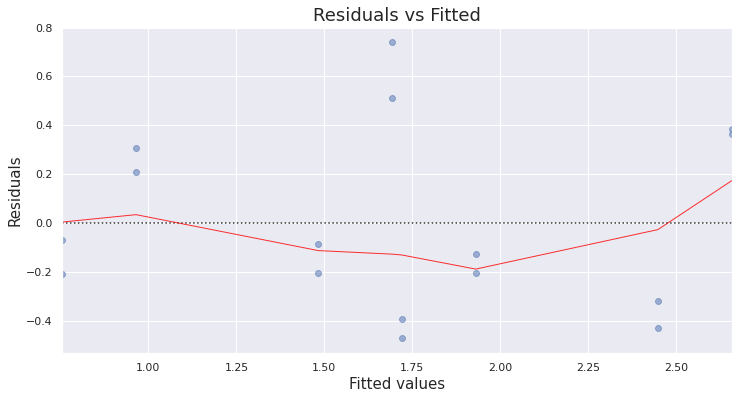

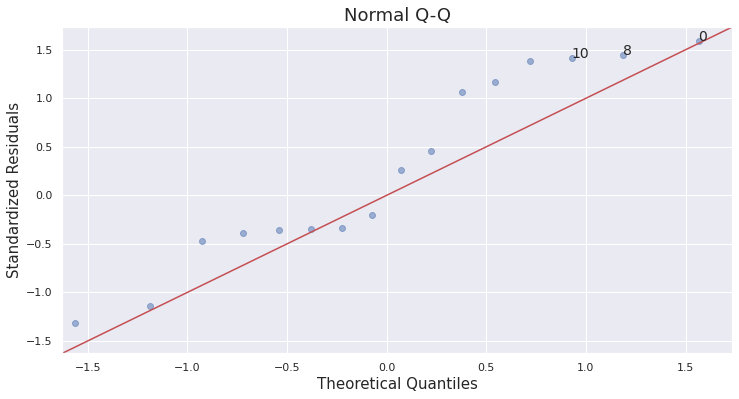

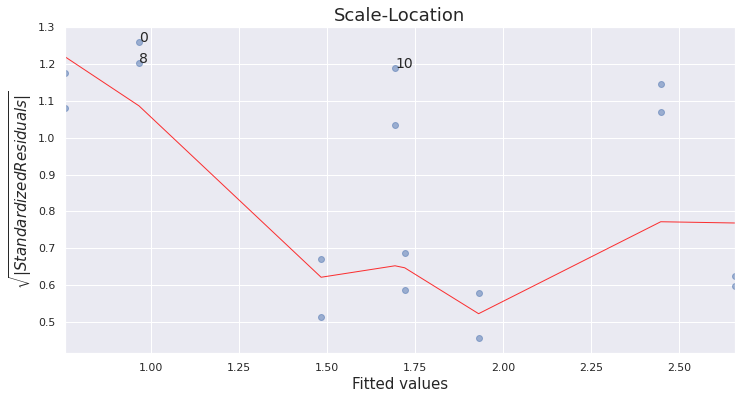

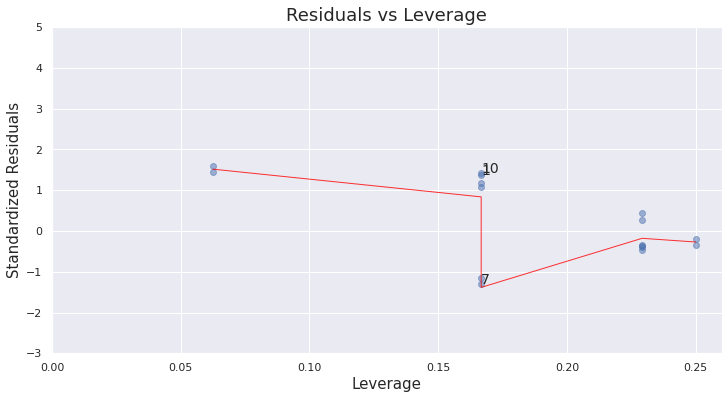

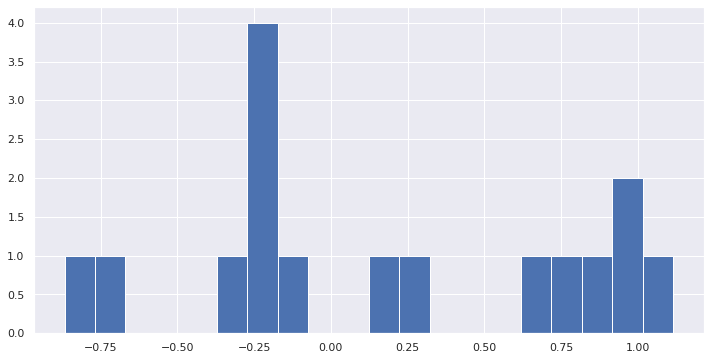

In [ ]:
X = pd.DataFrame(data, columns=['RW', 'RL', 'group'])
y = pd.DataFrame(data['time'])
diagnostics_plots(X, y)

- **Residuals vs Fitted:**
residuals should oscillate around 0 (and they do), since distribution of residuals has a mean of 0.
- **Normal Q-Q:**
standarized Residuals should lie along the qqnorm graph. They do lie in a close proximity to the qqnorm graph.
- **Scale-Location:**
This plot shows if residuals are spread equally along the ranges of predictors. This is how you can check the assumption of equal variance (homoscedasticity). It’s good if you see a horizontal line with equally (randomly) spread points. This is not really the case with our data.
- **Residuals vs Leverage:**
unlike the other plots, this time patterns are not relevant. We watch out for outlying values at the upper right corner or at the lower right corner. Those spots are the places where cases can be influential against a regression line. We do not have any outliers in those corners.

# Nested design

In [ ]:
data

,group,RW,RL,time
0,1,0,0,2.08
1,1,0,1,1.67
2,1,1,0,2.40
3,1,1,1,1.65
4,2,0,0,1.72
5,2,0,1,1.42
6,2,1,0,2.41
7,2,1,1,1.58
8,1,0,0,1.98
9,1,0,1,1.53


In [ ]:
copter_type = []
for i in range(len(data)):
    if data['RW'][i]==0 and data['RL'][i]==0:
        copter_type.append('RW+RL+')
    if data['RW'][i]==0 and data['RL'][i]==1:
        copter_type.append('RW+RL-')
    if data['RW'][i]==1 and data['RL'][i]==0:
        copter_type.append('RW-RL+')
    if data['RW'][i]==1 and data['RL'][i]==1:
        copter_type.append('RW-RL-')

In [ ]:
data['copter_type'] = copter_type

In [ ]:
data = data.drop(['RW', 'RL'], axis=1)

In [ ]:
data

,group,time,copter_type
0,1,2.08,RW+RL+
1,1,1.67,RW+RL-
2,1,2.40,RW-RL+
3,1,1.65,RW-RL-
4,2,1.72,RW+RL+
5,2,1.42,RW+RL-
6,2,2.41,RW-RL+
7,2,1.58,RW-RL-
8,1,1.98,RW+RL+
9,1,1.53,RW+RL-


In [ ]:
formula = 'time ~ C(group)/C(copter_type)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

                          df    sum_sq   mean_sq          F    PR(>F)
C(group)                 1.0  0.084100  0.084100  11.011457  0.010566
C(group):C(copter_type)  6.0  2.064775  0.344129  45.057829  0.000010
Residual                 8.0  0.061100  0.007637        NaN       NaN


Based on this table we can say that the group is not significant (with, for example, $\alpha = 0.01$), but the interaction effect is statistically significant.

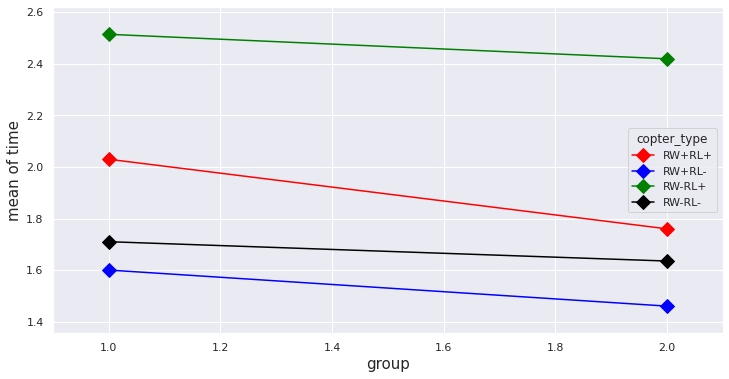

In [ ]:
fig = interaction_plot(data['group'], data['copter_type'], data['time'], colors=['red','blue', 'green', 'black'], markers=['D','D', 'D', 'D'], ms=10)

There seem to be no interactions between any of models.

In [ ]:
time_variance = np.var(data['time'])

In [ ]:
error = aov_table['mean_sq']['Residual']

In [ ]:
total = error + time_variance

In [ ]:
var_perc_of_total = time_variance / total

In [ ]:
var_perc_of_total

0.9476025598422074

In [ ]:
error_perc_of_total = error / total

In [ ]:
error_perc_of_total

0.052397440157792616

The percent contribution for copter model within
group is 94.8%

So the model-to-model variability is large (94.8%).

In [ ]:
rejected, pvals_corrected, _, _ = multipletests(pvals=aov_table['PR(>F)'].dropna(), alpha=0.01, method='bonferroni', is_sorted=False)

In [ ]:
rejected

array([False,  True])

First reject is false. It means that we do not reject H0, which states that group does not have an impact on our measurement. Second reject is True, which means we do reject H0, which states that interaction effect between groups and models does not have an impact our measurement. It means that models nested in groups are significant.

In [ ]:
pvals_corrected

array([2.11319469e-02, 1.95407249e-05])

In [ ]:
data['copter_type'] = data['copter_type'].factorize()[0]

In [ ]:
data

,group,time,copter_type
0,1,2.08,0
1,1,1.67,1
2,1,2.40,2
3,1,1.65,3
4,2,1.72,0
5,2,1.42,1
6,2,2.41,2
7,2,1.58,3
8,1,1.98,0
9,1,1.53,1


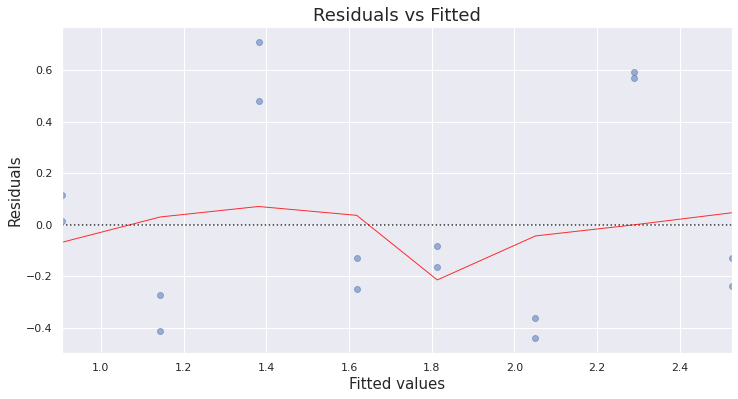

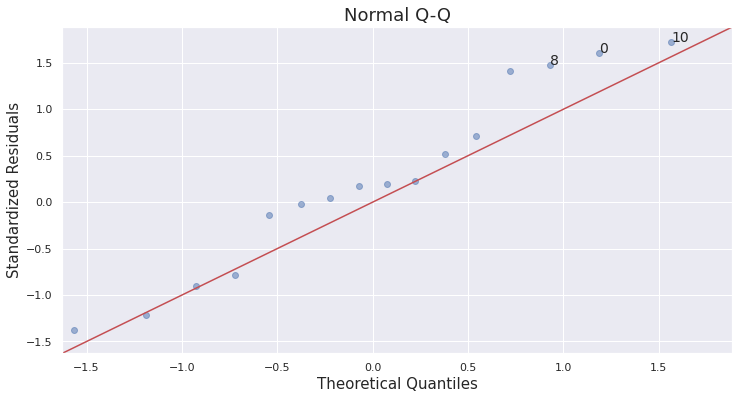

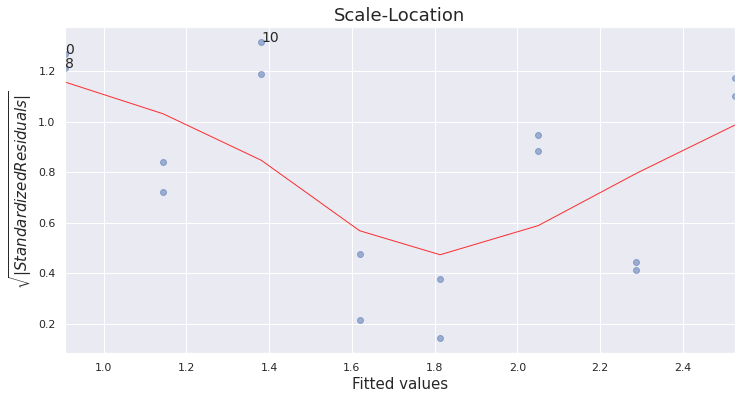

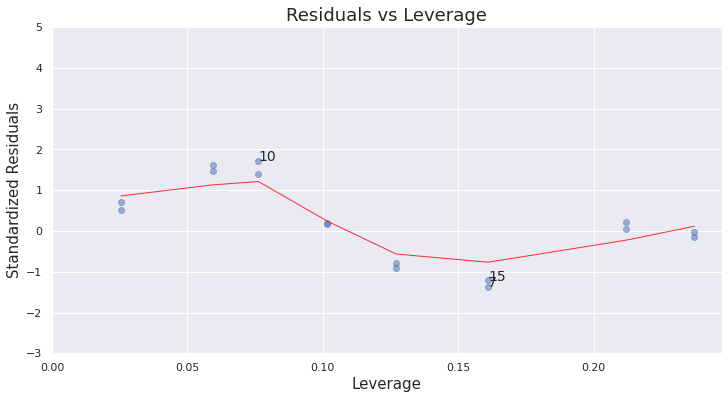

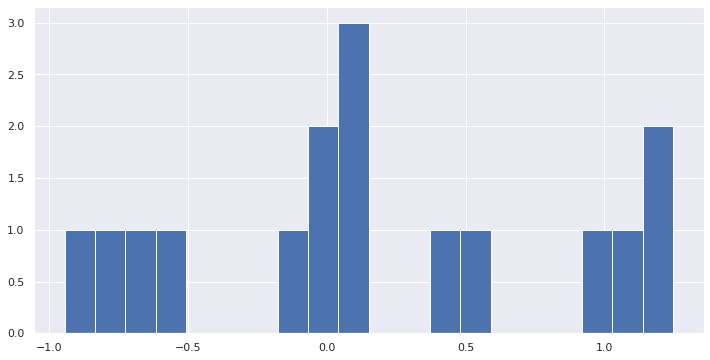

In [ ]:
X = pd.DataFrame(data, columns=['copter_type', 'group'])
y = pd.DataFrame(data['time'])
diagnostics_plots(X, y)

- **Residuals vs Fitted:**
residuals should oscillate around 0 (and they do), since distribution of residuals has a mean of 0.
- **Normal Q-Q:**
standarized Residuals should lie along the qqnorm graph. They do lie in a close proximity to the qqnorm graph.
- **Scale-Location:**
This plot shows if residuals are spread equally along the ranges of predictors. This is how you can check the assumption of equal variance (homoscedasticity). It’s good if you see a horizontal line with equally (randomly) spread points. This is not really the case with our data.
- **Residuals vs Leverage:**
unlike the other plots, this time patterns are not relevant. We watch out for outlying values at the upper right corner or at the lower right corner. Those spots are the places where cases can be influential against a regression line. We do not have any outliers in those corners.